In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import pefile
import seaborn as sns
import sklearn.ensemble as ek
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
dataset = pd.read_csv('C:/Users/Ritik/Documents/Untitled Folder/dataset_malwares.csv', low_memory=False)

In [3]:
dataset.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [4]:
dataset.shape

(19611, 79)

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
e_magic,19611.0,2.311700e+04,0.000000e+00,23117.0,23117.0,23117.0,23117.0,2.311700e+04
e_cblp,19611.0,1.786157e+02,9.872007e+02,0.0,144.0,144.0,144.0,5.944800e+04
e_cp,19611.0,7.166075e+01,1.445193e+03,0.0,3.0,3.0,3.0,6.320000e+04
e_crlc,19611.0,4.914696e+01,1.212202e+03,0.0,0.0,0.0,0.0,6.461300e+04
e_cparhdr,19611.0,3.737071e+01,8.645154e+02,0.0,4.0,4.0,4.0,4.369000e+04
...,...,...,...,...,...,...,...,...
ImageDirectoryEntryExport,19611.0,3.368566e+05,2.181191e+07,0.0,0.0,0.0,0.0,2.147484e+09
ImageDirectoryEntryImport,19611.0,4.047213e+05,4.704601e+06,0.0,29604.0,82224.0,247708.0,5.368914e+08
ImageDirectoryEntryResource,19611.0,5.555810e+05,6.772167e+06,0.0,40960.0,131072.0,387072.0,8.304108e+08
ImageDirectoryEntryException,19611.0,1.238834e+06,5.868961e+07,0.0,0.0,0.0,0.0,2.906159e+09


In [6]:
dataset.groupby(dataset['Malware']).size()

Malware
0     5012
1    14599
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

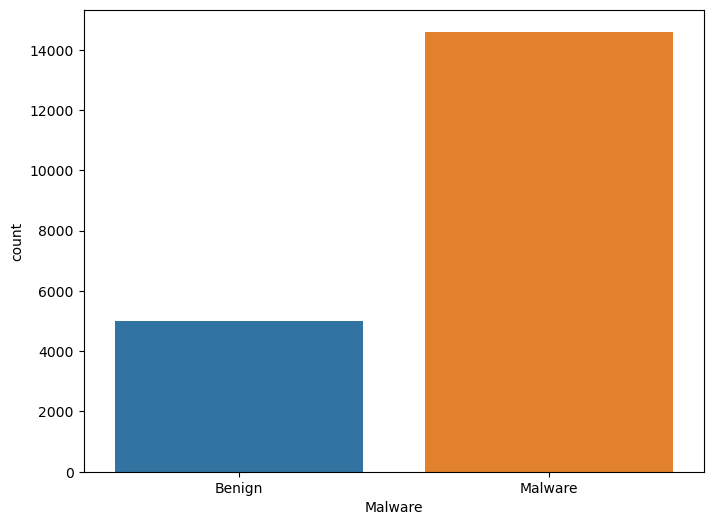

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Malware', data=dataset)
ax.set_xticklabels(['Benign', 'Malware'])
plt.show()

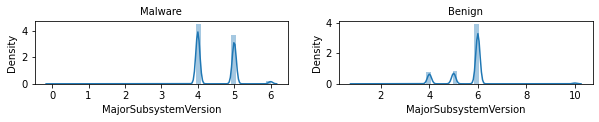

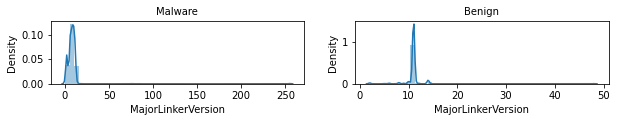

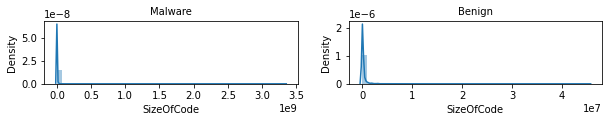

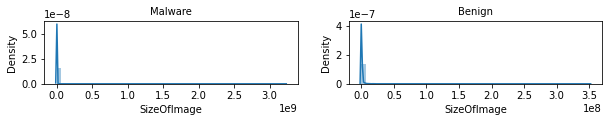

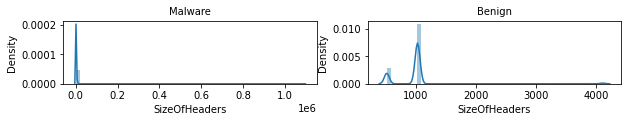

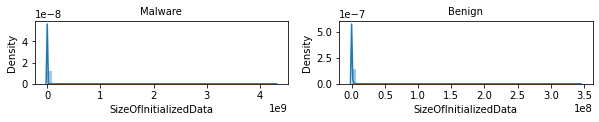

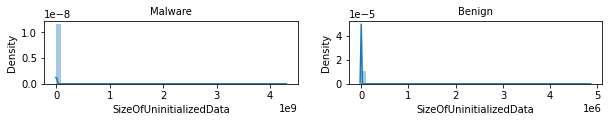

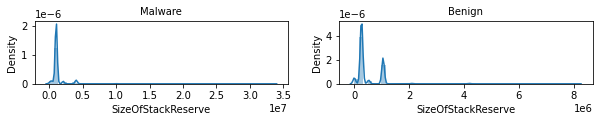

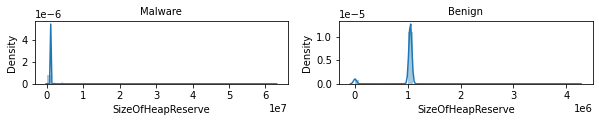

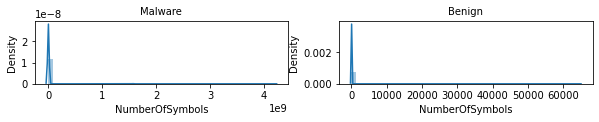

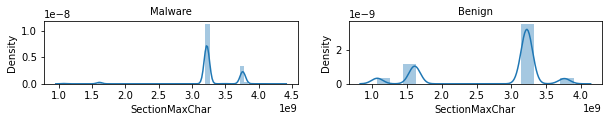

In [9]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
           'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 
            'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(dataset[dataset['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(dataset[dataset['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2
    

In [9]:
X = dataset.drop(['Name','Malware'],axis=1).values
y = dataset['Malware'].values

In [10]:
extratrees = ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

In [11]:
nbfeatures

19

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.2)

In [13]:
features = []
index = np.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

In [14]:
for f in range(nbfeatures):
    print("%d. feature %s (%.2f%%)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+f])

1. feature Magic (0.14%)
2. feature MinorSubsystemVersion (0.09%)
3. feature SectionMaxChar (0.07%)
4. feature DllCharacteristics (0.06%)
5. feature SectionAlignment (0.06%)
6. feature SizeOfHeaders (0.05%)
7. feature MajorImageVersion (0.05%)
8. feature SizeOfStackReserve (0.04%)
9. feature NumberOfSections (0.03%)
10. feature MinorOperatingSystemVersion (0.03%)
11. feature MinorLinkerVersion (0.03%)
12. feature SizeOfStackCommit (0.03%)
13. feature MajorLinkerVersion (0.02%)
14. feature MajorOperatingSystemVersion (0.02%)
15. feature e_ss (0.02%)
16. feature PointerToSymbolTable (0.02%)
17. feature SectionMinEntropy (0.02%)
18. feature SuspiciousImportFunctions (0.02%)
19. feature DirectoryEntryImport (0.01%)


In [24]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LinearRegression":LinearRegression()
}

In [26]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    score_percentage = score * 100
    print("%s : %.2f%%" % (algo, score_percentage))
    results[algo] = score_percentage

DecisionTree : 99.31%
RandomForest : 99.52%
Adaboost : 99.21%
GradientBoosting : 99.08%
GNB : 80.02%
LinearRegression : 67.59%


In [17]:
winner = max(results, key=results.get)

In [18]:
winner

'RandomForest'

In [19]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [20]:
y_pred = rfc.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99       997
     Malware       0.99      1.00      1.00      2926

    accuracy                           1.00      3923
   macro avg       1.00      0.99      0.99      3923
weighted avg       1.00      1.00      1.00      3923



Text(50.722222222222214, 0.5, 'True labels')

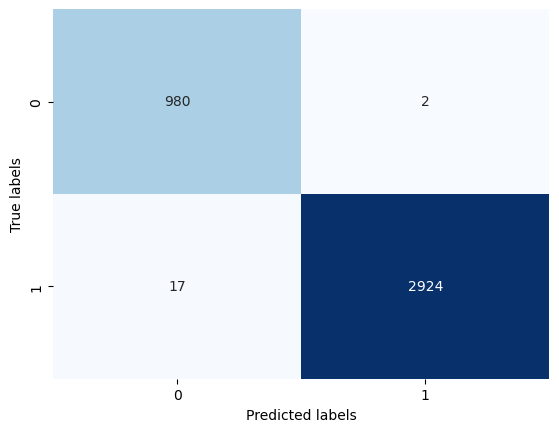

In [22]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(0.5, 1.0, 'Features importance')

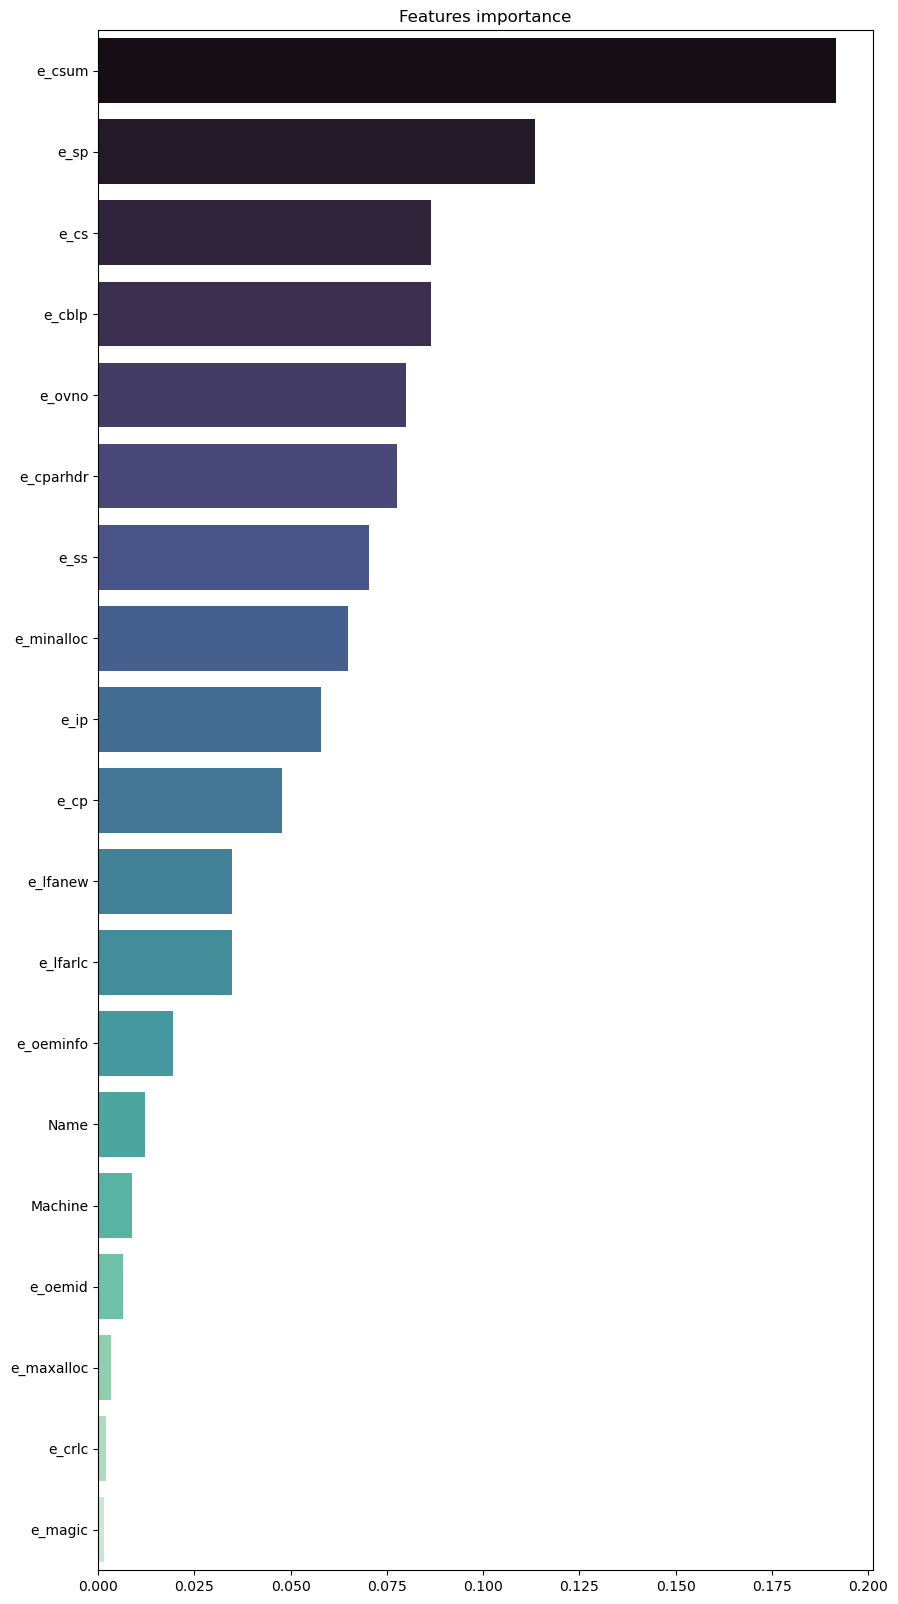

In [23]:
importance = rfc.feature_importances_
importance_dict = {dataset.columns.values[i]: importance[i] for i in range(len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')
